In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['font.size']=20
plt.rcParams["text.usetex"]=True

### Fourier transform of dynamical model

Non-dimensionalized equations in real space:

$$
\partial_{t} c = M \nabla^2 \Big( c^3 + \beta c + \gamma m - \kappa \nabla^2 c \Big) \\
\partial_{t} m = \nabla^2 \Big( m + \gamma w c \Big) + K c - m \\
$$

Under the strong segregation limit, the non-linear $c^3$ term is not very important for the dynamics. In this limit, the Fourier Transform of these linear equations looks like:

$$
\partial_t \begin{bmatrix} c_q \\ m_q \end{bmatrix} = 
\begin{bmatrix} -M \beta q^2 - M \kappa q^4 & -M \gamma q^2 \\ -\gamma w q^2 + K & -1-q^2 \end{bmatrix} 
\begin{bmatrix} c_q \\ m_q \end{bmatrix}
$$

**Approximation 1:**

When surface tension effects are not important ($\kappa = 0$) and the species m undergoes only pure diffusion ($w=0$), the trace and determinant are given by:
$$
Tr(J) = - (M \beta + 1) q^2 - 1 \\
Det(J) = M \beta q^2 \Big( q^2 + \frac{\gamma K}{\beta} + 1 \Big)
$$

Tasks:
1. For a given set of parameters, plot the trace and the determinant of the above matrix for different values of q

### Analysis of Approximation 1

In [81]:
class approximation_1:
    """
    Class that defines the dynamical model for the C-M system as described by approximation 1
    """
    
    def __init__(self, params):
        """
        Parameters of the model are M, beta, gamma, K
        """
        self.M = params['M'] # Ratio of diffusivities of M to C
        self.beta = params['beta'] # Nature of C-C interactions. Attraction if negative
        self.gamma = params['gamma'] # Nature of C-M interactions. Attractive if negative
        self.K = params['K'] # Ratio of production to degradation rate constants of M
        
    def _get_trace(self, q):
        """
        Function that returns the trace of the Jacobian matrix of the linearized model
        """
        return -(self.M*self.beta + 1.0)*q**2 - 1.0
    
    def _get_det(self, q):
        """
        Function that returns the determinant of the Jacobian matrix of the linearized model
        """
        return self.M*self.beta*q**2*(q**2 + self.gamma*self.K/self.beta + 1)
    
    def _get_phase_plot_data(self, q_range):
        """
        Function that takes in a range of values of the wave number q_range, and computes the determinant and trace
        """
        trace_range = self._get_trace(q_range)
        det_range = self._get_det(q_range)
        return trace_range, det_range
    
    def plot_phase_plot(self, ax, q_range):
        """
        Function to generate phase plots that help us visualize the different dynamical behaviors when perturbed about a steady state
        """
        trace, det = self._get_phase_plot_data(q_range)
        
        # plot the regions of different dynamical behaviors
        x_max = np.max(np.abs(trace))
        y_max = np.max(np.abs(det))
        x_range = np.linspace(-1.2*x_max, 1.2*x_max, 50)
        y_oscillatory_region = x_range**2/4.0
        ax.plot(x_range, y_oscillatory_region, '-k', linewidth=1)
        
        # Plot the phase plot for this model parameters
        ax.plot(trace, det, '-r', linewidth=2)
        ax.set_xlim([-1.2*x_max, 1.2*x_max])
        ax.set_ylim([-1.2*y_max, 1.2*y_max])
        
        ax.set_xlabel('tr(J)')
        ax.set_ylabel('det(J)')
        ax.axhline(y=0.0, color='k', linestyle='-')
        ax.axvline(x=0.0, color='k', linestyle='-')

### Generate plots for different model parameters

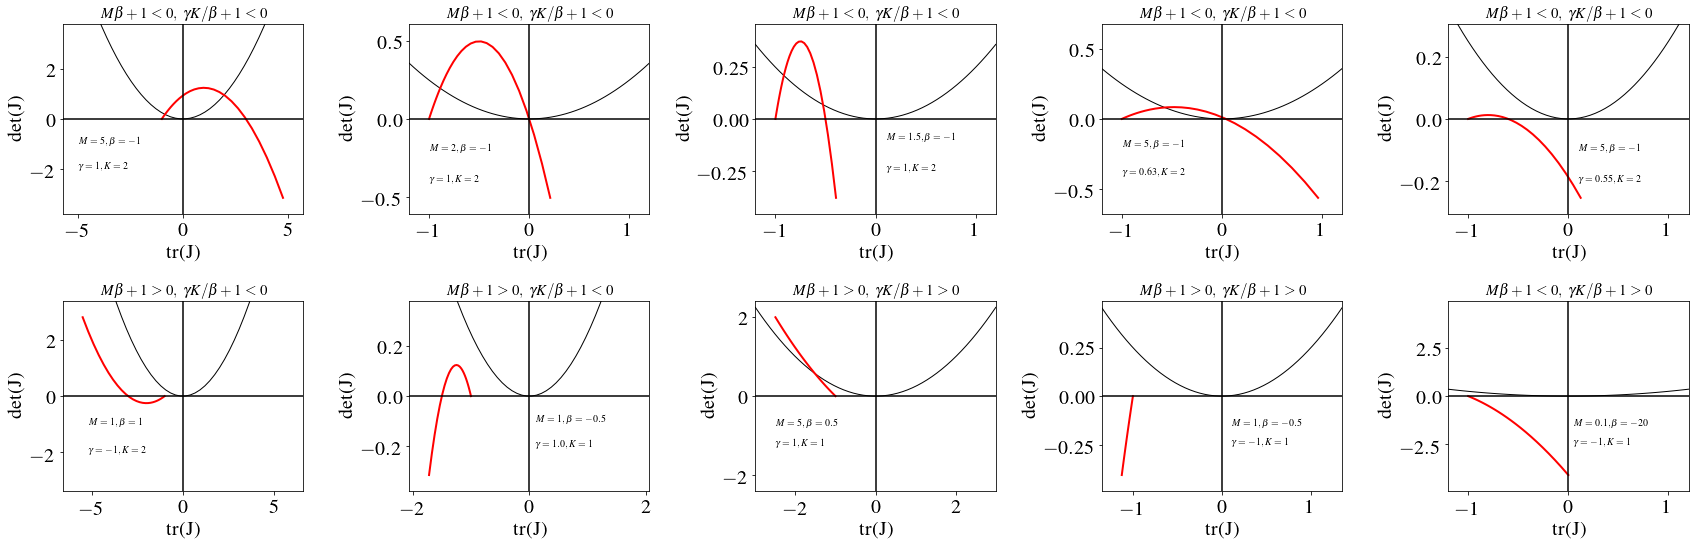

In [140]:
fig, axs = plt.subplots(2, 5, figsize=(24,8), constrained_layout = True)

# Case 1: M*beta + 1 < 0, and gamma*K/beta + 1 < 0

params = {'M': 5,
          'beta': -1,
          'gamma': 1,
          'K': 2
         }

q_range = np.linspace(0,1.2,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[0,0], q_range)
axs[0,0].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[0,0].text(-5.0, -1.0, r'$M = 5, \beta = -1$', fontsize=10)
axs[0,0].text(-5.0, -2.0, r'$\gamma = 1, K = 2$', fontsize=10)

params = {'M': 2.0,
          'beta': -1,
          'gamma': 1.0,
          'K': 2
         }

q_range = np.linspace(0,1.1,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[0,1], q_range)
axs[0,1].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[0,1].text(-1.0, -0.2, r'$M = 2, \beta = -1$', fontsize=10)
axs[0,1].text(-1.0, -0.4, r'$\gamma = 1, K = 2$', fontsize=10)

params = {'M': 1.5,
          'beta': -1,
          'gamma': 1.0,
          'K': 2
         }

q_range = np.linspace(0,1.1,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[0,2], q_range)
axs[0,2].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[0,2].text(0.1, -0.1, r'$M = 1.5, \beta = -1$', fontsize=10)
axs[0,2].text(0.1, -0.25, r'$\gamma = 1, K = 2$', fontsize=10)

params = {'M': 5.0,
          'beta': -1,
          'gamma': 0.63,
          'K': 2
         }

q_range = np.linspace(0,0.7,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[0,3], q_range)
axs[0,3].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[0,3].text(-1.0, -0.2, r'$M = 5, \beta = -1$', fontsize=10)
axs[0,3].text(-1.0, -0.4, r'$\gamma = 0.63, K = 2$', fontsize=10)

params = {'M': 5.0,
          'beta': -1,
          'gamma': 0.55,
          'K': 2
         }

q_range = np.linspace(0,0.53,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[0,4], q_range)
axs[0,4].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[0,4].text(0.1, -0.1, r'$M = 5, \beta = -1$', fontsize=10)
axs[0,4].text(0.1, -0.2, r'$\gamma = 0.55, K = 2$', fontsize=10)

# Case 2: M*beta + 1 > 0, and gamma*K/beta + 1 < 0

# Sub case: beta > 0

params = {'M': 1.0,
          'beta': 1,
          'gamma': -1.0,
          'K': 2
         }

q_range = np.linspace(0,1.5,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[1,0], q_range)
axs[1,0].set_title(r'$M \beta + 1 > 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[1,0].text(-5.2, -1.0, r'$M = 1, \beta = 1$', fontsize=10)
axs[1,0].text(-5.2, -2.0, r'$\gamma = -1, K = 2$', fontsize=10)

# sub case: beta < 0

params = {'M': 1.0,
          'beta': -0.5,
          'gamma': 1.0,
          'K': 1
         }

q_range = np.linspace(0,1.2,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[1,1], q_range)
axs[1,1].set_title(r'$M \beta + 1 > 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[1,1].text(0.1, -0.1, r'$M = 1, \beta = -0.5$', fontsize=10)
axs[1,1].text(0.1, -0.2, r'$\gamma = 1.0, K = 1$', fontsize=10)

# Case 3: M*beta + 1 > 0, and gamma*K/beta + 1 > 0

# Sub case: beta > 0

params = {'M': 1.0,
          'beta': 0.5,
          'gamma': 1.0,
          'K': 1
         }

q_range = np.linspace(0,1.0,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[1,2], q_range)
axs[1,2].set_title(r'$M \beta + 1 > 0, ~ \gamma K / \beta + 1 > 0$', fontsize=15)
axs[1,2].text(-2.5, -0.75, r'$M = 5, \beta = 0.5$', fontsize=10)
axs[1,2].text(-2.5, -1.25, r'$\gamma = 1, K = 1$', fontsize=10)

# Sub case: beta < 0

params = {'M': 1.0,
          'beta': -0.5,
          'gamma': -1.0,
          'K': 1
         }

q_range = np.linspace(0,0.5,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[1,3], q_range)
axs[1,3].set_title(r'$M \beta + 1 > 0, ~ \gamma K / \beta + 1 > 0$', fontsize=15)
axs[1,3].text(0.1, -0.15, r'$M = 1, \beta = -0.5$', fontsize=10)
axs[1,3].text(0.1, -0.25, r'$\gamma = -1, K = 1$', fontsize=10)


# Case 4: M*beta + 1 < 0, and gamma*K/beta + 1 > 0

params = {'M': 0.1,
          'beta': -20.0,
          'gamma': -1.0,
          'K': 1
         }

q_range = np.linspace(0,1.0,30)
analysis_obj = approximation_1(params)
analysis_obj.plot_phase_plot(axs[1,4], q_range)
axs[1,4].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 > 0$', fontsize=15)
axs[1,4].text(0.05, -1.5, r'$M = 0.1, \beta = -20$', fontsize=10)
axs[1,4].text(0.05, -2.5, r'$\gamma = -1, K = 1$', fontsize=10)


fig.tight_layout()
plt.savefig('20220526_Stability_Plot_Approximation_1.svg', format='svg', dpi=600)
plt.savefig('20220526_Stability_Plot_Approximation_1.png', format='png', dpi=600)

### Analysis of approximation 2

**Approximation 2:**

When surface tension effects are important and the species m undergoes only pure diffusion ($w=0$), the trace and determinant are given by:
$$
Tr(J) = - M \kappa q^4 - (M \beta + 1) q^2 - 1 \\
Det(J) = M \kappa q^6 + (M \kappa + M \beta) q^4 + M \beta q^2 \Big( \frac{\gamma K}{\beta} + 1 \Big)
$$

In [83]:
class approximation_2:
    """
    Class that defines the dynamical model for the C-M system as described by approximation 1
    """
    
    def __init__(self, params):
        """
        Parameters of the model are M, beta, gamma, K
        """
        self.M = params['M'] # Ratio of diffusivities of M to C
        self.beta = params['beta'] # Nature of C-C interactions. Attraction if negative
        self.gamma = params['gamma'] # Nature of C-M interactions. Attractive if negative
        self.K = params['K'] # Ratio of production to degradation rate constants of M
        self.kappa = params['kappa'] # Ratio of surface tension to reaction-diffusion length scale
        
    def _get_trace(self, q):
        """
        Function that returns the trace of the Jacobian matrix of the linearized model
        """
        return -self.M*self.kappa*q**4 -(self.M*self.beta + 1.0)*q**2 - 1.0
    
    def _get_det(self, q):
        """
        Function that returns the determinant of the Jacobian matrix of the linearized model
        """
        return self.M*self.kappa*q**6 + (self.M*self.kappa + self.M*self.beta)*q**4 + self.M*self.beta*q**2*(self.gamma*self.K/self.beta + 1)
    
    def _get_phase_plot_data(self, q_range):
        """
        Function that takes in a range of values of the wave number q_range, and computes the determinant and trace
        """
        trace_range = self._get_trace(q_range)
        det_range = self._get_det(q_range)
        return trace_range, det_range
    
    def plot_phase_plot(self, ax, q_range):
        """
        Function to generate phase plots that help us visualize the different dynamical behaviors when perturbed about a steady state
        """
        trace, det = self._get_phase_plot_data(q_range)
        
        # plot the regions of different dynamical behaviors
        x_max = np.max(np.abs(trace))
        y_max = np.max(np.abs(det))
        x_range = np.linspace(-1.2*x_max, 1.2*x_max, 50)
        y_oscillatory_region = x_range**2/4.0
        ax.plot(x_range, y_oscillatory_region, '-k', linewidth=1)
        
        # Plot the phase plot for this model parameters
        ax.plot(trace, det, '-r', linewidth=2)
        ax.set_xlim([-1.2*x_max, 1.2*x_max])
        ax.set_ylim([-1.2*y_max, 1.2*y_max])
        
        ax.set_xlabel('tr(J)')
        ax.set_ylabel('det(J)')
        ax.axhline(y=0.0, color='k', linestyle='-')
        ax.axvline(x=0.0, color='k', linestyle='-')

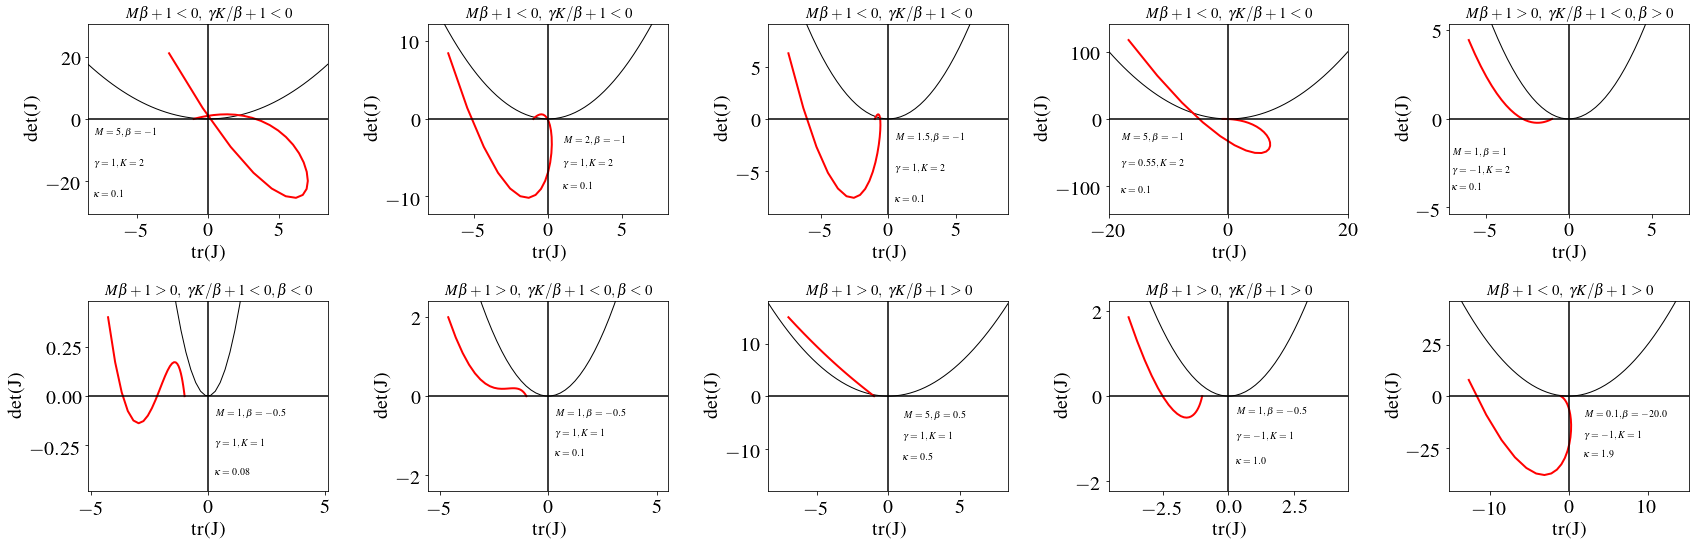

In [141]:
fig, axs = plt.subplots(2, 5, figsize=(24,8), constrained_layout = True)

# Case 1: M*beta + 1 < 0, and gamma*K/beta + 1 < 0

params = {'M': 5,
          'beta': -1,
          'gamma': 1,
          'K': 2,
          'kappa': 0.1
         }

q_range = np.linspace(0,2.9,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[0,0], q_range)
axs[0,0].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[0,0].text(-8.0, -5.0, r'$M = 5, \beta = -1$', fontsize=10)
axs[0,0].text(-8.0, -15.0, r'$\gamma = 1, K = 2$', fontsize=10)
axs[0,0].text(-8.0, -25.0, r'$\kappa = 0.1$', fontsize=10)


params = {'M': 2,
          'beta': -1,
          'gamma': 1,
          'K': 2,
          'kappa': 0.1
         }

q_range = np.linspace(0,2.9,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[0,1], q_range)
axs[0,1].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[0,1].text(1.0, -3.0, r'$M = 2, \beta = -1$', fontsize=10)
axs[0,1].text(1.0, -6.0, r'$\gamma = 1, K = 2$', fontsize=10)
axs[0,1].text(1.0, -9.0, r'$\kappa = 0.1$', fontsize=10)

params = {'M': 1.5,
          'beta': -1,
          'gamma': 1,
          'K': 2,
          'kappa': 0.1
         }

q_range = np.linspace(0,2.9,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[0,2], q_range)
axs[0,2].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[0,2].text(0.5, -2.0, r'$M = 1.5, \beta = -1$', fontsize=10)
axs[0,2].text(0.5, -5.0, r'$\gamma = 1, K = 2$', fontsize=10)
axs[0,2].text(0.5, -8.0, r'$\kappa = 0.1$', fontsize=10)


params = {'M': 5,
          'beta': -1,
          'gamma': 0.55,
          'K': 2,
          'kappa': 0.1
         }

q_range = np.linspace(0,3.3,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[0,3], q_range)
axs[0,3].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 < 0$', fontsize=15)
axs[0,3].text(-18.0, -30.0, r'$M = 5, \beta = -1$', fontsize=10)
axs[0,3].text(-18.0, -70.0, r'$\gamma = 0.55, K = 2$', fontsize=10)
axs[0,3].text(-18.0, -110.0, r'$\kappa = 0.1$', fontsize=10)


params = {'M': 1,
          'beta': 1,
          'gamma': -1,
          'K': 2,
          'kappa': 0.1
         }

q_range = np.linspace(0,1.5,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[0,4], q_range)
axs[0,4].set_title(r'$M \beta + 1 > 0, ~ \gamma K / \beta + 1 < 0, \beta > 0$', fontsize=15)
axs[0,4].text(-7.0, -2.0, r'$M = 1, \beta = 1$', fontsize=10)
axs[0,4].text(-7.0, -3.0, r'$\gamma = -1, K = 2$', fontsize=10)
axs[0,4].text(-7.0, -4.0, r'$\kappa = 0.1$', fontsize=10)


params = {'M': 1,
          'beta': -0.5,
          'gamma': 1.0,
          'K': 1.0,
          'kappa': 0.08
         }

q_range = np.linspace(0,2.0,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[1,0], q_range)
axs[1,0].set_title(r'$M \beta + 1 > 0, ~ \gamma K / \beta + 1 < 0, \beta < 0$', fontsize=15)
axs[1,0].text(0.3, -0.1, r'$M = 1, \beta = -0.5$', fontsize=10)
axs[1,0].text(0.3, -0.25, r'$\gamma = 1, K = 1$', fontsize=10)
axs[1,0].text(0.3, -0.4, r'$\kappa = 0.08$', fontsize=10)

params = {'M': 1,
          'beta': -0.5,
          'gamma': 1.0,
          'K': 1.0,
          'kappa': 0.1
         }

q_range = np.linspace(0,2.0,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[1,1], q_range)
axs[1,1].set_title(r'$M \beta + 1 > 0, ~ \gamma K / \beta + 1 < 0, \beta < 0$', fontsize=15)
axs[1,1].text(0.3, -0.5, r'$M = 1, \beta = -0.5$', fontsize=10)
axs[1,1].text(0.3, -1.0, r'$\gamma = 1, K = 1$', fontsize=10)
axs[1,1].text(0.3, -1.5, r'$\kappa = 0.1$', fontsize=10)


params = {'M': 5,
          'beta': 0.5,
          'gamma': 1.0,
          'K': 1.0,
          'kappa': 0.5
         }

q_range = np.linspace(0,1.0,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[1,2], q_range)
axs[1,2].set_title(r'$M \beta + 1 > 0, ~ \gamma K / \beta + 1 > 0$', fontsize=15)
axs[1,2].text(1.0, -4.0, r'$M = 5, \beta = 0.5$', fontsize=10)
axs[1,2].text(1.0, -8.0, r'$\gamma = 1, K = 1$', fontsize=10)
axs[1,2].text(1.0, -12.0, r'$\kappa = 0.5$', fontsize=10)


params = {'M': 1,
          'beta': -0.5,
          'gamma': -1.0,
          'K': 1.0,
          'kappa': 1.0
         }

q_range = np.linspace(0,1.2,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[1,3], q_range)
axs[1,3].set_title(r'$M \beta + 1 > 0, ~ \gamma K / \beta + 1 > 0$', fontsize=15)
axs[1,3].text(0.3, -0.4, r'$M = 1, \beta = -0.5$', fontsize=10)
axs[1,3].text(0.3, -1.0, r'$\gamma = -1, K = 1$', fontsize=10)
axs[1,3].text(0.3, -1.6, r'$\kappa = 1.0$', fontsize=10)

params = {'M': 0.1,
          'beta': -20.0,
          'gamma': -1.0,
          'K': 1.0,
          'kappa': 1.9
         }

q_range = np.linspace(0,3.3,30)
analysis_obj = approximation_2(params)
analysis_obj.plot_phase_plot(axs[1,4], q_range)
axs[1,4].set_title(r'$M \beta + 1 < 0, ~ \gamma K / \beta + 1 > 0$', fontsize=15)
axs[1,4].text(2.0, -10.0, r'$M = 0.1, \beta = -20.0$', fontsize=10)
axs[1,4].text(2.0, -20.0, r'$\gamma = -1, K = 1$', fontsize=10)
axs[1,4].text(2.0, -30.0, r'$\kappa = 1.9$', fontsize=10)

fig.tight_layout()
plt.savefig('20220526_Stability_Plot_Approximation_2.svg', format='svg', dpi=600)
plt.savefig('20220526_Stability_Plot_Approximation_2.png', format='png', dpi=600)